In [258]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import geopandas as gpd

#### [LINE/DOT CHART: Fire incidents per year]

In [259]:
df_fe_combined_modified = pd.read_csv(
    'Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)


In [260]:
df_fe_combined_modified = df_fe_combined_modified[df_fe_combined_modified['YEAR'] != 2015]

In [261]:
df_fire_counts_yearly = df_fe_combined_modified.groupby(
    'YEAR')['FIRE_INCIDENT_COUNT'].sum().reset_index(name='YEARLY_FIRE_INCIDENT_COUNT')

In [262]:
df_fire_counts_yearly.describe(include='all')

,YEAR,YEARLY_FIRE_INCIDENT_COUNT
count,7.000000,7.000000
mean,2019.000000,17527.000000
std,2.160247,667.494569
min,2016.000000,16843.000000
25%,2017.500000,16977.500000
50%,2019.000000,17329.000000
75%,2020.500000,18019.500000
max,2022.000000,18523.000000


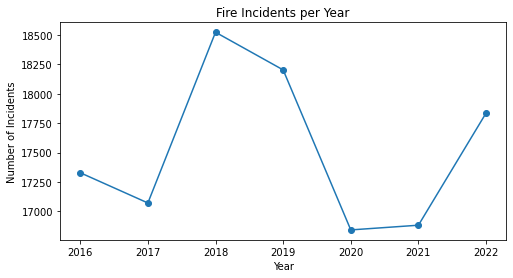

In [263]:
# Create line chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_fire_counts_yearly['YEAR'],
        df_fire_counts_yearly['YEARLY_FIRE_INCIDENT_COUNT'], marker='o')

# set chart title and axis labels
plt.title('Fire Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')

# set x-axis tick marks
ax.set_xticks(df_fire_counts_yearly['YEAR'])

# display the chart
plt.show();


In [264]:
# File Output
fire_incidents_yearly_file_name = 'fire_incidents_yearly_lineplot.png'
fire_incidents_yearly_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    fire_incidents_yearly_file_name
if os.path.exists(fire_incidents_yearly_file_name):
    os.remove(fire_incidents_yearly_file_name)
    # Save the plot to a file
    fig.savefig(fire_incidents_yearly_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(fire_incidents_yearly_file_path, dpi=300, bbox_inches='tight')

In [265]:
# File Output
df_fire_incidents_yearly_file_name = 'df_fire_incidents_yearly.csv'
df_fire_incidents_yearly_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    df_fire_incidents_yearly_file_name
if os.path.exists(df_fire_incidents_yearly_file_name):
    os.remove(df_fire_incidents_yearly_file_name)
    df_fire_counts_yearly.to_csv(
        df_fire_incidents_yearly_file_path, index=True)
else:
    df_fire_counts_yearly.to_csv(
        df_fire_incidents_yearly_file_path, index=True)

#### [HISTOGRAM: Fire incidents per grid]

In [266]:
df_fe_combined_modified = pd.read_csv(
    'Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)


In [267]:
df_fire_counts_groupby_grid = df_fe_combined_modified.groupby(
    '1000_GRID_ID')['FIRE_INCIDENT_COUNT'].sum().reset_index(name='FIRE_INCIDENT_COUNT_PER_GRID')

In [268]:
df_fire_counts_groupby_grid.describe(include='all')

,1000_GRID_ID,FIRE_INCIDENT_COUNT_PER_GRID
count,714,714.000000
unique,714,NaN
top,3sEbCHGYVFQ=,NaN
freq,1,NaN
mean,NaN,188.197479
std,NaN,300.328929
min,NaN,0.000000
25%,NaN,4.000000
50%,NaN,89.000000
75%,NaN,249.000000


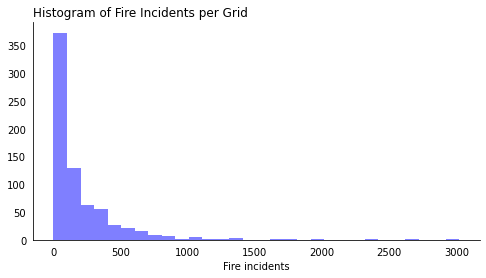

In [269]:
# Create histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_fire_counts_groupby_grid['FIRE_INCIDENT_COUNT_PER_GRID'],
        bins=30, color='blue', alpha=0.5)
# Remove tick marks
ax.tick_params(left=False, bottom=False)

# Remove left and top borders
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Shift the histogram to the left
ax.spines['right'].set_position(('axes', 0))
ax.spines['bottom'].set_position(('axes', 0))
# set chart title and axis labels
plt.title('Histogram of Fire Incidents per Grid', loc='left')
plt.xlabel('Fire incidents')

# display the chart
plt.show();

In [270]:
# File Output
fire_incidents_per_grid_histogram_file_name = 'fire_incidents_per_grid_histogram.png'
fire_incidents_per_grid_histogram_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    fire_incidents_per_grid_histogram_file_name
if os.path.exists(fire_incidents_per_grid_histogram_file_name):
    os.remove(fire_incidents_per_grid_histogram_file_name)
    # Save the plot to a file
    fig.savefig(fire_incidents_per_grid_histogram_file_path,
                dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(fire_incidents_per_grid_histogram_file_path,
                dpi=300, bbox_inches='tight')

In [271]:
# File Output
df_fire_counts_groupby_grid_file_name = 'df_fire_counts_groupby_grid.csv'
df_fire_counts_groupby_grid_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    df_fire_counts_groupby_grid_file_name
if os.path.exists(df_fire_counts_groupby_grid_file_name):
    os.remove(df_fire_counts_groupby_grid_file_name)
    df_fire_counts_groupby_grid.to_csv(
        df_fire_counts_groupby_grid_file_path, index=True)
else:
    df_fire_counts_groupby_grid.to_csv(
        df_fire_counts_groupby_grid_file_path, index=True)

#### [MAP (HEATMAP): Fire incidents per grid]

In [272]:
gdf = gpd.read_file('Data/Generated_grids/square_grids1000.shp')

In [273]:
merged_df_fire_counts_groupby_grid = gdf.merge(df_fire_counts_groupby_grid,
                                      left_on='grid_id', right_on='1000_GRID_ID')

In [274]:
merged_df_fire_counts_groupby_grid.to_file('Data/Data_visualization_folders/data_exploration_and_cleaning/merged_df_fire_counts_groupby_grid.shp',
                                  driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-274-3a172499deb0>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_fire_counts_groupby_grid.to_file('Data/Data_visualization_folders/data_exploration_and_cleaning/merged_df_fire_counts_groupby_grid.shp',


#### [HISTOGRAM: Average Fire incident count per grid]

In [275]:
df_fe_combined_modified = pd.read_csv(
    'Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)

In [276]:
df_fire_incidents_mean_groupby_grid = df_fe_combined_modified.groupby(
    '1000_GRID_ID')['FIRE_INCIDENT_COUNT'].mean().reset_index(name='FIRE_INCIDENT_MEAN_PER_GRID')

In [277]:
df_fire_incidents_mean_groupby_grid.describe(include='all')

,1000_GRID_ID,FIRE_INCIDENT_MEAN_PER_GRID
count,714,714.000000
unique,714,NaN
top,3sEbCHGYVFQ=,NaN
freq,1,NaN
mean,NaN,2.045625
std,NaN,3.264445
min,NaN,0.000000
25%,NaN,0.043478
50%,NaN,0.967391
75%,NaN,2.706522


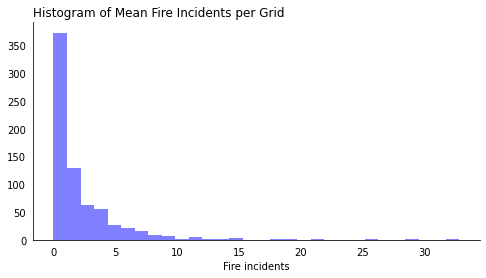

In [278]:
# Create histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_fire_incidents_mean_groupby_grid['FIRE_INCIDENT_MEAN_PER_GRID'],
        bins=30, color='blue', alpha=0.5)
# Remove tick marks
ax.tick_params(left=False, bottom=False)

# Remove left and top borders
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Shift the histogram to the left
ax.spines['right'].set_position(('axes', 0))
ax.spines['bottom'].set_position(('axes', 0))

# set chart title and axis labels
plt.title('Histogram of Mean Fire Incidents per Grid', loc='left')
plt.xlabel('Fire incidents')

# display the chart
plt.show();

In [279]:
# File Output
mean_fire_incidents_per_grid_histogram_file_name = 'mean_fire_incidents_per_grid_histogram.png'
mean_fire_incidents_per_grid_histogram_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    mean_fire_incidents_per_grid_histogram_file_name
if os.path.exists(mean_fire_incidents_per_grid_histogram_file_name):
    os.remove(mean_fire_incidents_per_grid_histogram_file_name)
    # Save the plot to a file
    fig.savefig(mean_fire_incidents_per_grid_histogram_file_path,
                dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(mean_fire_incidents_per_grid_histogram_file_path,
                dpi=300, bbox_inches='tight')

In [280]:
# File Output
df_fire_incidents_mean_groupby_grid_file_name = 'df_fire_incidents_mean_groupby_grid.csv'
df_fire_incidents_mean_groupby_grid_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    df_fire_incidents_mean_groupby_grid_file_name
if os.path.exists(df_fire_incidents_mean_groupby_grid_file_name):
    os.remove(df_fire_counts_groupby_grid_file_name)
    df_fire_incidents_mean_groupby_grid.to_csv(
        df_fire_incidents_mean_groupby_grid_file_path, index=True)
else:
    df_fire_incidents_mean_groupby_grid.to_csv(
        df_fire_incidents_mean_groupby_grid_file_path, index=True)

#### [MAP (HEATMAP): Average Fire incident count per grid]

In [281]:
merged_df_fire_incidents_mean_groupby_grid = gdf.merge(df_fire_incidents_mean_groupby_grid,
                                      left_on='grid_id', right_on='1000_GRID_ID')

In [282]:
merged_df_fire_incidents_mean_groupby_grid.to_file('Data/Data_visualization_folders/data_exploration_and_cleaning/merged_df_fire_incidents_mean_groupby_grid.shp',
                                  driver='ESRI Shapefile', encoding='utf-8')

<ipython-input-282-7d52c704f97a>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_df_fire_incidents_mean_groupby_grid.to_file('Data/Data_visualization_folders/data_exploration_and_cleaning/merged_df_fire_incidents_mean_groupby_grid.shp',


#### [HISTOGRAM: Crimes per grid]

In [283]:
df_fe_combined_modified = pd.read_csv(
    'Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)

In [284]:
df_crime_counts_groupby_grid = df_fe_combined_modified.groupby(
    '1000_GRID_ID')['CRIME_COUNT'].sum().reset_index(name='CRIME_COUNT_PER_GRID')

In [285]:
df_crime_counts_groupby_grid.describe(include='all')

,1000_GRID_ID,CRIME_COUNT_PER_GRID
count,714,714.000000
unique,714,NaN
top,3sEbCHGYVFQ=,NaN
freq,1,NaN
mean,NaN,268.831933
std,NaN,443.327232
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,94.500000
75%,NaN,370.000000


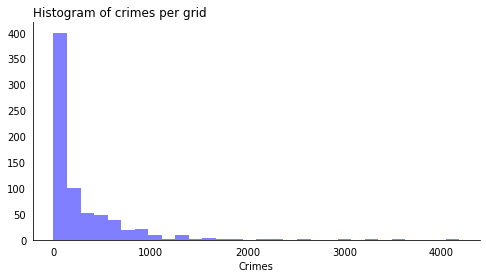

In [286]:
fig, ax = plt.subplots(figsize=(8, 4))

# Create histogram with dark blue color
ax.hist(df_crime_counts_groupby_grid['CRIME_COUNT_PER_GRID'],
        bins=30, color='blue', alpha=0.5)

# Remove tick marks
ax.tick_params(left=False, bottom=False)

# Remove left and top borders
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Shift the histogram to the left
ax.spines['right'].set_position(('axes', 0))
ax.spines['bottom'].set_position(('axes', 0))

# Set chart title and axis labels
plt.title('Histogram of crimes per grid', loc='left')
plt.xlabel('Crimes')

# Display the chart
plt.show();


In [287]:
# File Output
crimes_per_grid_histogram_file_name = 'crimes_per_grid_histogram.png'
crimes_per_grid_histogram_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    crimes_per_grid_histogram_file_name
if os.path.exists(crimes_per_grid_histogram_file_name):
    os.remove(crimes_per_grid_histogram_file_name)
    # Save the plot to a file
    fig.savefig(crimes_per_grid_histogram_file_path,
                dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(crimes_per_grid_histogram_file_path,
                dpi=300, bbox_inches='tight')

In [288]:
# File Output
df_crime_counts_groupby_grid_file_name = 'df_crime_counts_groupby_grid.csv'
df_crime_counts_groupby_grid_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    df_fire_counts_groupby_grid_file_name
if os.path.exists(df_crime_counts_groupby_grid_file_name):
    os.remove(df_crime_counts_groupby_grid_file_name)
    df_crime_counts_groupby_grid.to_csv(
        df_crime_counts_groupby_grid_file_path, index=True)
else:
    df_crime_counts_groupby_grid.to_csv(
        df_crime_counts_groupby_grid_file_path, index=True)


#### [HISTOGRAM: Number of property assessments per borough]

In [289]:
df_fe_combined_modified = pd.read_csv(
    'Data/Processed_Datasets/Combined_tables/df_fe_combined.csv', index_col=0)

In [290]:
df_property_assessment_groupby_district = df_fe_combined_modified.groupby(
    'CODEMAMROT')['PROPERTY_ASSESSMENT_COUNT'].mean().reset_index(name='MEAN_PROPERTY_ASSESSMENT_PER_DISTRICT')

In [291]:
df_property_assessment_groupby_district.describe(include='all')

,CODEMAMROT,MEAN_PROPERTY_ASSESSMENT_PER_DISTRICT
count,34,34.000000
unique,34,NaN
top,66072,NaN
freq,1,NaN
mean,NaN,14752.676471
std,NaN,11692.637165
min,NaN,74.000000
25%,NaN,6179.500000
50%,NaN,11948.500000
75%,NaN,25930.250000


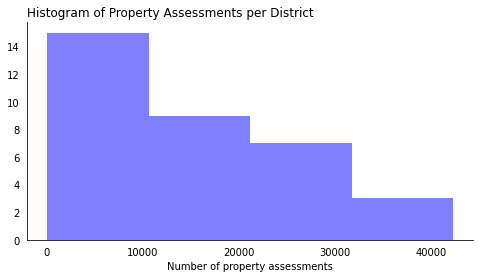

In [292]:
# Create histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_property_assessment_groupby_district['MEAN_PROPERTY_ASSESSMENT_PER_DISTRICT'],
        bins=4, color='blue', alpha=0.5)

# Remove tick marks
ax.tick_params(left=False, bottom=False)

# Remove left and top borders
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# Shift the histogram to the left
ax.spines['right'].set_position(('axes', 0))
ax.spines['bottom'].set_position(('axes', 0))

# set chart title and axis labels
plt.title('Histogram of Property Assessments per District', loc='left')
plt.xlabel('Number of property assessments')

# display the chart
plt.show();


In [293]:
# File Output
pa_per_district_histogram_file_name = 'pa_per_district_histogram.png'
pa_per_district_histogram_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    fire_incidents_per_grid_histogram_file_name
if os.path.exists(pa_per_district_histogram_file_name):
    os.remove(pa_per_district_histogram_file_name)
    # Save the plot to a file
    fig.savefig(pa_per_district_histogram_file_path,
                dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(pa_per_district_histogram_file_path,
                dpi=300, bbox_inches='tight')


In [294]:
# File Output
df_property_assessment_groupby_district_file_name = 'df_property_assessment_groupby_district.csv'
df_property_assessment_groupby_district_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    df_property_assessment_groupby_district_file_name
if os.path.exists(df_property_assessment_groupby_district_file_name):
    os.remove(df_property_assessment_groupby_district_file_name)
    df_property_assessment_groupby_district.to_csv(
        df_property_assessment_groupby_district_file_path, index=True)
else:
    df_property_assessment_groupby_district.to_csv(
        df_property_assessment_groupby_district_file_path, index=True)


#### [CORRELATION MATRIX I: Incidents]

In [295]:
df_incidents = pd.read_csv(
    'Data/Processed_Datasets/Cleaned_datasets/df_incidents.csv', index_col=0)

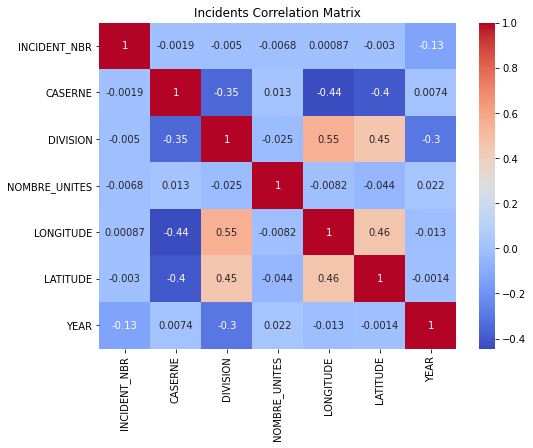

In [296]:
# Calculate correlation matrix
corr_matrix = df_incidents.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set chart title
plt.title('Incidents Correlation Matrix')

# display the chart
plt.show();

In [297]:
# File Output
incidents_corr_matrix_file_name = 'incidents_corr_matrix.png'
incidents_corr_matrix_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    incidents_corr_matrix_file_name
if os.path.exists(incidents_corr_matrix_file_name):
    os.remove(incidents_corr_matrix_file_name)
    # Save the plot to a file
    fig.savefig(incidents_corr_matrix_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(incidents_corr_matrix_file_path, dpi=300, bbox_inches='tight')

#### [CORRELATION MATRIX III: Property Assessments]

In [298]:
df_property_assessment = pd.read_csv(
    'Data/Processed_Datasets/Cleaned_datasets/df_property_assessment.csv', index_col=0)

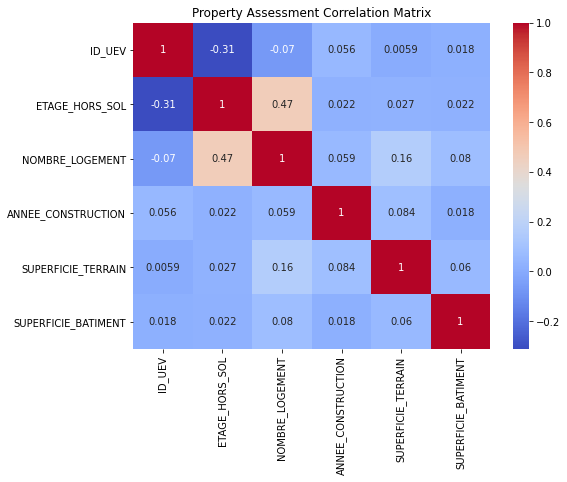

In [299]:
# Calculate correlation matrix
corr_matrix = df_property_assessment.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set chart title
plt.title('Property Assessment Correlation Matrix')

# display the chart
plt.show();

In [300]:
# File Output
pa_corr_matrix_file_name = 'pa_corr_matrix.png'
pa_corr_matrix_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    pa_corr_matrix_file_name
if os.path.exists(pa_corr_matrix_file_name):
    os.remove(pa_corr_matrix_file_name)
    # Save the plot to a file
    fig.savefig(pa_corr_matrix_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(pa_corr_matrix_file_path, dpi=300, bbox_inches='tight')


#### [CORRELATION MATRIX III: Weather]

In [301]:
df_weather = pd.read_csv(
    'Data/Processed_Datasets/Cleaned_datasets/df_weather.csv', index_col=0)

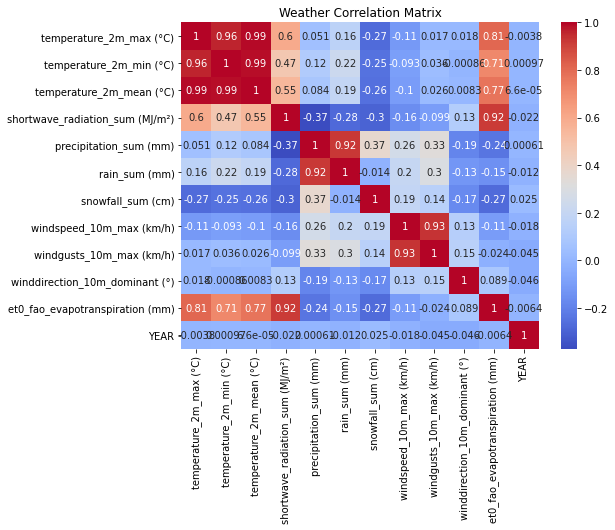

In [302]:
# Calculate correlation matrix
corr_matrix = df_weather.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set chart title
plt.title('Weather Correlation Matrix')

# display the chart
plt.show();


In [303]:
# File Output
weather_corr_matrix_file_name = 'weather_corr_matrix.png'
weather_corr_matrix_file_path = 'Data/Data_visualization_folders/data_exploration_and_cleaning/' + \
    weather_corr_matrix_file_name
if os.path.exists(weather_corr_matrix_file_name):
    os.remove(weather_corr_matrix_file_name)
    # Save the plot to a file
    fig.savefig(weather_corr_matrix_file_path, dpi=300, bbox_inches='tight')
else:
    # Save the plot to a file
    fig.savefig(weather_corr_matrix_file_path, dpi=300, bbox_inches='tight')